,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


,YearsExperience
26,9.5
3,2.0
24,8.7
22,7.9
23,8.2


26    116969.0
3      43525.0
24    109431.0
22    101302.0
23    113812.0
Name: Salary, dtype: float64

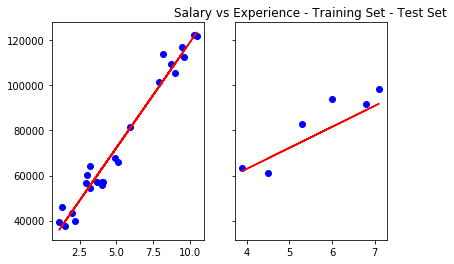

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


# - - - - - - - - - - - -
# Linear regression 2D
# - - - - - - - - - - - -


# - Set path - 
#convert to raw string and add an extra \ to the end (not to escape the string)
os.chdir(r"C:\Users\msfernandez\Machine Learning A-Z\Machine Learning A-Z Template Folder\Part 2 - Regression\Section 4 - Simple Linear Regression\\")

# - - - - - - - - - - - -
# - import the dataset - 
# - - - - - - - - - - - -
dataset = pd.read_csv("Salary_Data.csv")
display(dataset.head())


X = dataset.iloc[: , :-1]
Y = dataset.iloc[: , 1]

from sklearn.model_selection import train_test_split 
[X_train,X_test,Y_train,Y_test] = train_test_split(X, Y, test_size = 0.2, random_state = 1)
#X_train = X_train.astype(float)
display(X_train.head())
display(Y_train.head())


# - - - - - - - - - - - -
# Linear regression
# - - - - - - - - - - - -
from sklearn.linear_model import LinearRegression
# Fit
regressor= LinearRegression()
regressor.fit(X_train,Y_train)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(X_train,Y_train, color ='blue')
ax1.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Salary vs Experience - Training Set - Test Set')
# Predict Test set results
y_pred = regressor.predict(X_test)

ax2.scatter(X_test,Y_test, color ='blue')
ax2.plot(X_test, regressor.predict(X_test), color = 'red')


Full Dataset


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Train


,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
32,63408.86,129219.61,46085.25,0,0
39,38558.51,82982.09,174999.30,0,0
21,78389.47,153773.43,299737.29,0,1
36,28663.76,127056.21,201126.82,1,0
19,86419.70,153514.11,0.00,0,1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           2.16e-31
Time:                        11:03:54   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

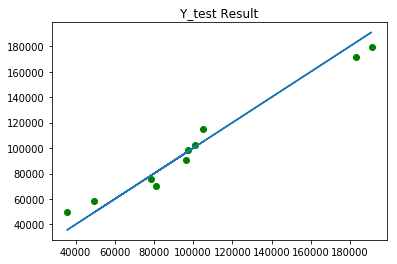

In [154]:
# - - - - - - - - - - - - - - 
# Multiple Linear regression
# - - - - - - - - - - - - - -
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# - Set path - 
#convert to raw string and add an extra \ to the end (not to escape the string)
os.chdir(r"C:\Users\msfernandez\Machine Learning A-Z\Machine Learning A-Z Template Folder\Part 2 - Regression\Section 5 - Multiple Linear Regression\\")

# - - - - - - - - - - - -
# - import the dataset - 
# - - - - - - - - - - - -
dataset = pd.read_csv("50_Startups.csv")
print ('Full Dataset')
display(dataset.head())

X = dataset.iloc[: , :-1]
Y = dataset.iloc[: , dataset.shape[1]-1]

#get dummies variable columns for categorical data;
X = pd.get_dummies(X,columns=['State'], drop_first = True)

from sklearn.model_selection import train_test_split 
[X_train,X_test,Y_train,Y_test] = train_test_split(X, Y, test_size = 0.2, random_state = 1)
#X_train = X_train.astype(float)
print ('Train')
display(X_train.head())
#display(Y_train.head())

# - - - - - - - - - - - - - - 
# Fitting  Multiple Linear regression
# - - - - - - - - - - - - - -
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Predict Test set results
Y_pred = regressor.predict(X_test)

plt.scatter(Y_test,Y_pred, color = 'green')
plt.plot(Y_test, Y_test)
plt.title('Y_test Result')

# - - - - - - - - - - - - - - 
# Backward Elimination to build the optimal model
# - - - - - - - - - - - - - - 
import statsmodels.formula.api as sm

#Cte in lineair model is not part of the statsmodels library --> add constant 1 column to the feature
X = np.append(arr = np.ones((X.shape[0],1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0,1,2,3,4,5]] #specify indexes of the columns (? not needed ?)
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
# Look for predictor with the most significant features (lowest P-value stay, P>0.05 are removed 1 at a time)
# regressor_OLS.summary()

# Redo a couple times
X_opt = X[:, [0,1,3]] 
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()
# --> R&D spend & Marketing Spend are statistically significant.



In [174]:
# To automate the backwards elimination process:
# Create a loop that drops the features with the highest P value
import statsmodels.formula.api as sm
def backwardElimination(x, y, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)#.astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, Y, SL)
#print(X_Modeled)


#2nd option: Backward Elimination with p-values and Adjusted R Squared:
import statsmodels.formula.api as sm
def backwardElimination(x,y, SL):
    numVars = len(x[0])
    temp = np.zeros((50,6)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)#.astype(float)
        adjR_before = regressor_OLS.rsquared_adj#.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt,Y, SL)


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           2.16e-31
Time:                        11:10:56   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.0